In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.manifold import TSNE

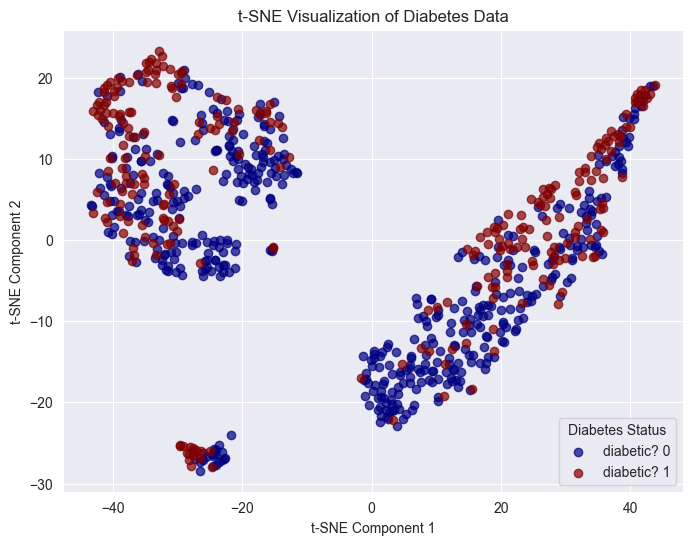

In [46]:
# Load dataset
df = pd.read_csv('diabetes.csv')

# Assuming the last column contains the labels (adjust column name if needed)
label_column = 'Outcome'  # Update this to the correct column name in your dataset
X = df.drop(columns=[label_column])  # Drop the label column for t-SNE
labels = df[label_column].values  # Extract labels

# Perform t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_embedded = tsne.fit_transform(X)

# Define unique labels and color mapping
unique_labels = np.unique(labels)
colors = plt.cm.jet(np.linspace(0, 1, len(unique_labels)))  # Correct color mapping
label_to_color = {label: color for label, color in zip(unique_labels, colors)}

# Plot t-SNE with colors based on labels
plt.figure(figsize=(8, 6))
for label in unique_labels:
    idx = labels == label  # Proper boolean indexing
    plt.scatter(X_embedded[idx, 0], X_embedded[idx, 1], color=[label_to_color[label]], label=f'diabetic? {label}', alpha=0.7)

plt.legend(title="Diabetes Status")
plt.title("t-SNE Visualization of Diabetes Data")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.show()


In [47]:
from sklearn.manifold import trustworthiness
trusts = [trustworthiness(X, X_embedded, n_neighbors=n) for n in range(10,105, 10)]
trust=max(trusts)
print(f"Diabetes TSNE Trustworthiness Score: {trust:.4f}")

Diabetes TSNE Trustworthiness Score: 0.9914


In [49]:
from scipy.stats import spearmanr
from sklearn.metrics.pairwise import euclidean_distances

high_dist = euclidean_distances(X)
low_dist = euclidean_distances(X_embedded)

corr, _ = spearmanr(high_dist.ravel(), low_dist.ravel())
print(f"Diabetes TSNE Spearman Correlation: {corr:.4f}")

Diabetes TSNE Spearman Correlation: 0.7876


['3' '2' '2' ... '2' '2' '2']


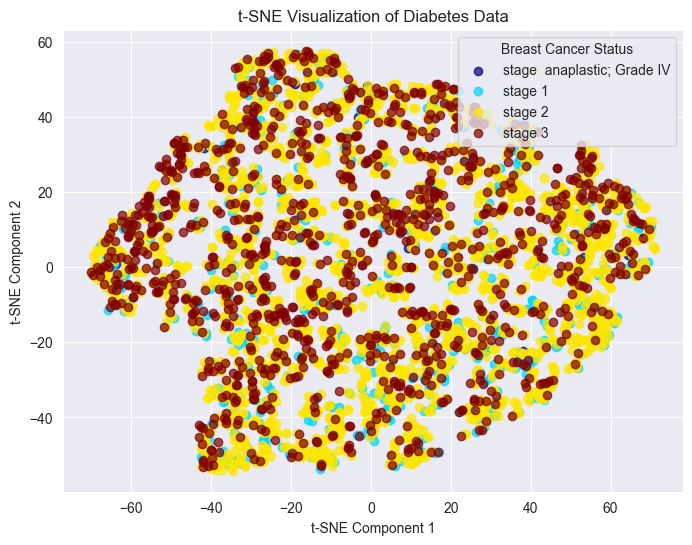

In [50]:
df = pd.read_csv('Breast_Cancer.csv')

# Assuming the last column contains the labels (adjust column name if needed)
label_column = 'Grade'  # Update this to the correct column name in your dataset
X = df.drop(columns=[label_column])  # Drop the label column for t-SNE
labels = df[label_column].values  # Extract labels
X = pd.get_dummies(X)
# Perform t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_embedded = tsne.fit_transform(X)

# Define unique labels and color mapping
unique_labels = np.unique(labels)
colors = plt.cm.jet(np.linspace(0, 1, len(unique_labels)))  # Correct color mapping
label_to_color = {label: color for label, color in zip(unique_labels, colors)}
print(labels)
# Plot t-SNE with colors based on labels
plt.figure(figsize=(8, 6))
for label in unique_labels:
    idx = labels == label  # Proper boolean indexing
    plt.scatter(X_embedded[idx, 0], X_embedded[idx, 1], color=[label_to_color[label]], label=f'stage {label}', alpha=0.7)

plt.legend(title="Breast Cancer Status")
plt.title("t-SNE Visualization of Diabetes Data")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.show()

In [6]:
from sklearn.manifold import trustworthiness
trust = trustworthiness(X, X_embedded, n_neighbors=30)
print(f"Trustworthiness Score: {trust:.4f}")

Trustworthiness Score: 0.9839


In [7]:
from scipy.stats import spearmanr
from sklearn.metrics.pairwise import euclidean_distances

high_dist = euclidean_distances(X)
low_dist = euclidean_distances(X_embedded)

corr, _ = spearmanr(high_dist.ravel(), low_dist.ravel())
print(f"Spearman Correlation: {corr:.4f}")

Spearman Correlation: 0.7407


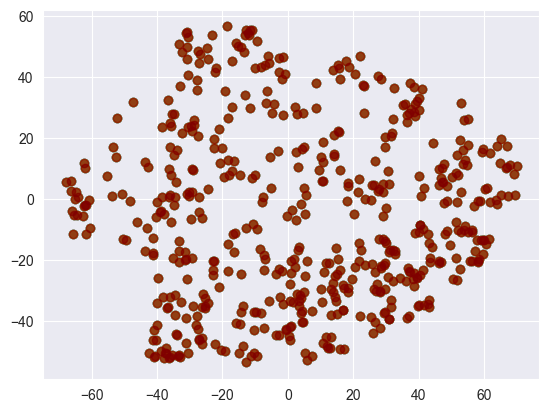

In [5]:
for label in unique_labels:
    idx = labels == '1'  # Proper boolean indexing
    plt.scatter(X_embedded[idx, 0], X_embedded[idx, 1], color=[label_to_color[label]], label=f'stage {label}', alpha=0.7)

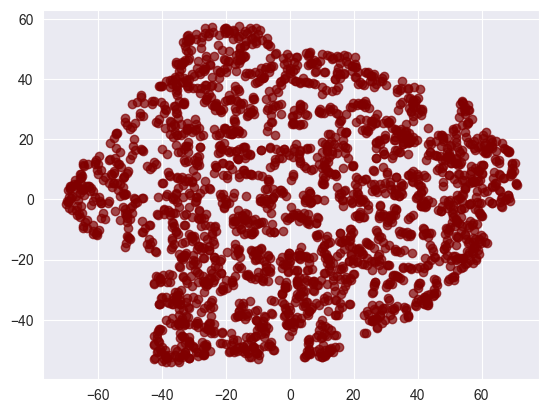

In [6]:
idx = labels == '2'  # Proper boolean indexing
plt.scatter(X_embedded[idx, 0], X_embedded[idx, 1], color=[label_to_color[label]], label=f'stage {label}', alpha=0.7)

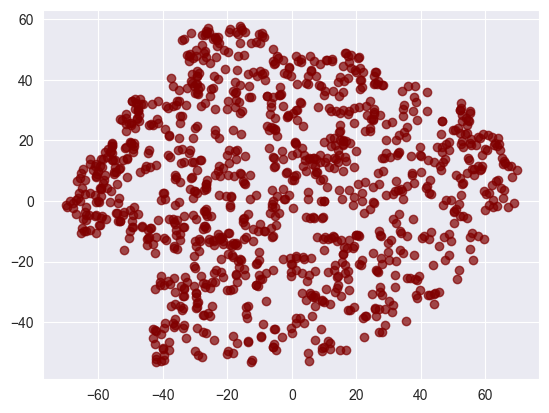

In [7]:
idx = labels == '3'  # Proper boolean indexing
plt.scatter(X_embedded[idx, 0], X_embedded[idx, 1], color=[label_to_color[label]], label=f'stage {label}', alpha=0.7)

Number of Samples: 569


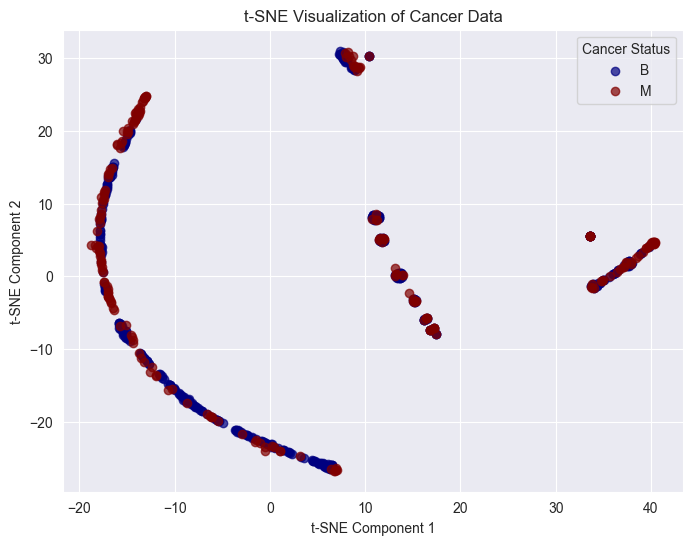

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.manifold import TSNE

# Load dataset
df = pd.read_csv('Cancer_Data.csv')

# Define label column
label_column = 'diagnosis'  # Adjust if needed
labels = df[label_column].values  # Extract labels
df = df.drop(columns=[label_column])  # Drop label column for t-SNE

# Handle missing values using KNN Imputer
imputer = KNNImputer(n_neighbors=2)
df_imputed = imputer.fit_transform(pd.get_dummies(df))  # Encode categorical features

# Check number of samples
n_samples = df_imputed.shape[0]
print(f"Number of Samples: {n_samples}")

# Perform t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_embedded = tsne.fit_transform(df_imputed)

# Define unique labels and color mapping
unique_labels = np.unique(labels)
colors = plt.cm.jet(np.linspace(0, 1, len(unique_labels)))  # Color mapping
label_to_color = {label: color for label, color in zip(unique_labels, colors)}

# Plot t-SNE
plt.figure(figsize=(8, 6))
for label in unique_labels:
    idx = np.array(labels) == label  # Convert to NumPy array for indexing
    plt.scatter(X_embedded[idx, 0], X_embedded[idx, 1], color=[label_to_color[label]], label=f'{label}', alpha=0.7)

plt.legend(title="Cancer Status")
plt.title("t-SNE Visualization of Cancer Data")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.show()


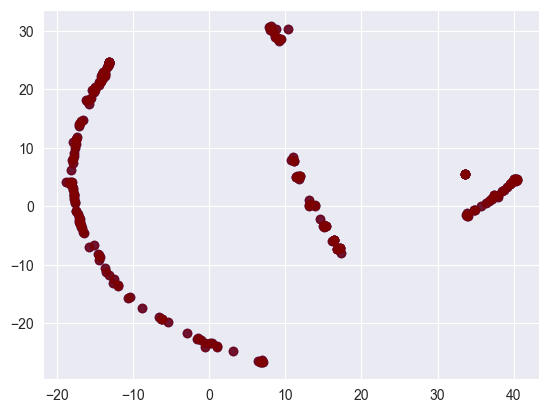

In [9]:
for label in unique_labels:
    idx = np.array(labels) == 'M'  # Convert to NumPy array for indexing
    plt.scatter(X_embedded[idx, 0], X_embedded[idx, 1], color=[label_to_color[label]], label=f'{label}', alpha=0.7)

In [10]:
import umap
from sklearn.preprocessing import StandardScaler

/Users/shin/umap_testing/pythonProject1/.venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


/Users/shin/umap_testing/pythonProject1/.venv/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shin/umap_testing/pythonProject1/.venv/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


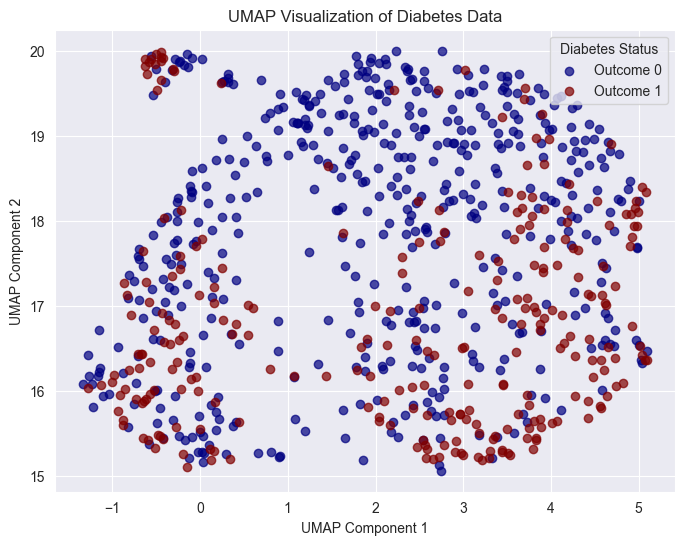

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import umap
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

# Load dataset
dia = pd.read_csv("diabetes.csv")

# Define label column
label_column = 'Outcome'  # Adjust if needed
labels = dia[label_column].values  # Extract labels
dia = dia.drop(columns=[label_column])  # Drop label column

# Handle missing values using KNN Imputer
imputer = KNNImputer(n_neighbors=5)  # Adjust `n_neighbors` based on your dataset
df_imputed = imputer.fit_transform(pd.get_dummies(dia))  # Encode categorical features

# Scale the data
scaled_dia_data = StandardScaler().fit_transform(df_imputed)

# Apply UMAP for dimensionality reduction
reducer = umap.UMAP(n_neighbors=100, random_state=42)
X_embedded = reducer.fit_transform(scaled_dia_data)  # Store the transformed output

# Define unique labels and color mapping
unique_labels = np.unique(labels)
colors = plt.cm.jet(np.linspace(0, 1, len(unique_labels)))  # Color mapping
label_to_color = {label: color for label, color in zip(unique_labels, colors)}

plt.figure(figsize=(8, 6))
for label in unique_labels:
    idx = labels == label  # Proper boolean indexing
    plt.scatter(X_embedded[idx, 0], X_embedded[idx, 1], color=[label_to_color[label]], label=f'Outcome {label}', alpha=0.7)

plt.legend(title="Diabetes Status")
plt.title("UMAP Visualization of Diabetes Data")
plt.xlabel("UMAP Component 1")
plt.ylabel("UMAP Component 2")
plt.show()


In [53]:
from sklearn.manifold import trustworthiness
trusts = [trustworthiness(df_imputed, X_embedded, n_neighbors=n) for n in range(10,105,10)]
trust = max(trusts)
print(f"Diabetes UMAP Trustworthiness Score: {trust:.4f}")

Diabetes UMAP Trustworthiness Score: 0.8190


In [32]:
from scipy.stats import spearmanr
from sklearn.metrics.pairwise import euclidean_distances

high_dist = euclidean_distances(X)
low_dist = euclidean_distances(X_embedded)

corr, _ = spearmanr(high_dist.ravel(), low_dist.ravel())
print(f"Spearman Correlation: {corr:.4f}")

Spearman Correlation: 0.3875


/Users/shin/umap_testing/pythonProject1/.venv/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shin/umap_testing/pythonProject1/.venv/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


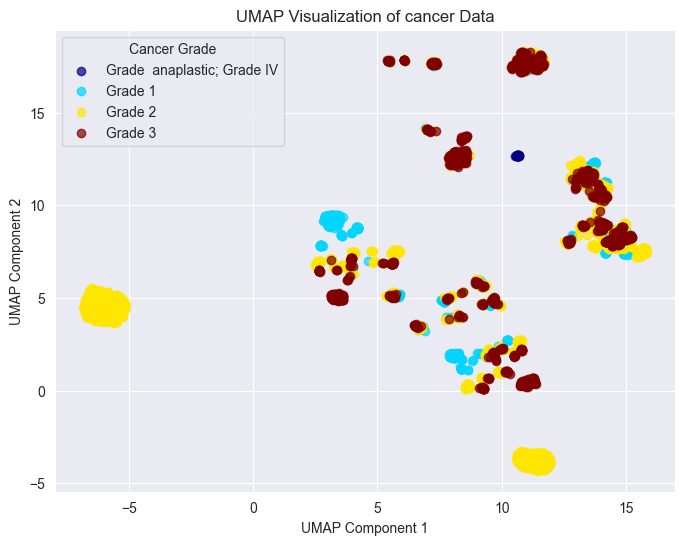

In [36]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
import umap

b_cancer = pd.read_csv("Breast_Cancer.csv")

# Define label column
label_column = 'Grade'  # Adjust if needed
labels = b_cancer[label_column].values  # Extract labels
b_cancer = b_cancer.drop(columns=[label_column])  # Drop label column

# Handle missing values using KNN Imputer
imputer = KNNImputer(n_neighbors=5)  # Adjust `n_neighbors` based on your dataset
df_imputed = imputer.fit_transform(pd.get_dummies(b_cancer))  # Encode categorical features

# Scale the data
scaled_dia_data = StandardScaler().fit_transform(df_imputed)

# Apply UMAP for dimensionality reduction
reducer = umap.UMAP(n_neighbors=100, random_state=42)
X_embedded_umap = reducer.fit_transform(scaled_dia_data)  # Store the transformed output

# Define unique labels and color mapping
unique_labels = np.unique(labels)
colors = plt.cm.jet(np.linspace(0, 1, len(unique_labels)))  # Color mapping
label_to_color = {label: color for label, color in zip(unique_labels, colors)}

plt.figure(figsize=(8, 6))
for label in unique_labels:
    idx = labels == label  # Proper boolean indexing
    plt.scatter(X_embedded_umap[idx, 0], X_embedded_umap[idx, 1], color=[label_to_color[label]], label=f'Grade {label}', alpha=0.7)

plt.legend(title="Cancer Grade")
plt.title("UMAP Visualization of cancer Data")
plt.xlabel("UMAP Component 1")
plt.ylabel("UMAP Component 2")
plt.show()

In [44]:
from sklearn.manifold import trustworthiness
trusts = [trustworthiness(df_imputed, X_embedded_umap, n_neighbors=n) for n in range(10,105,10)]
trust = max(trusts)
print(f"Cancer UMAP Trustworthiness Score: {trust:.4f}")

Cancer UMAP Trustworthiness Score: 0.7482


In [45]:
from scipy.stats import spearmanr
from sklearn.metrics.pairwise import euclidean_distances

high_dist = euclidean_distances(df_imputed)
low_dist = euclidean_distances(X_embedded_umap)

corr, _ = spearmanr(high_dist.ravel(), low_dist.ravel())
print(f"Cancer UMAP Spearman Correlation: {corr:.4f}")

Cancer UMAP Spearman Correlation: 0.0982


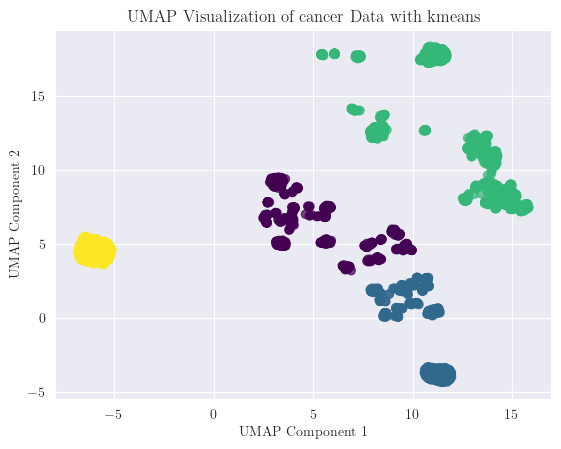

In [16]:
from sklearn.cluster import KMeans
num_clusters = 4  # Adjust based on dataset
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
plt.title("UMAP Visualization of cancer Data with kmeans")
plt.xlabel("UMAP Component 1")
plt.ylabel("UMAP Component 2")
cluster_labels = kmeans.fit_predict(X_embedded_umap)
plt.scatter(X_embedded_umap[:, 0], X_embedded_umap[:, 1], c=cluster_labels, cmap="viridis", alpha=0.7)

<Axes: title={'center': 'Persistence diagram'}, xlabel='Birth', ylabel='Death'>

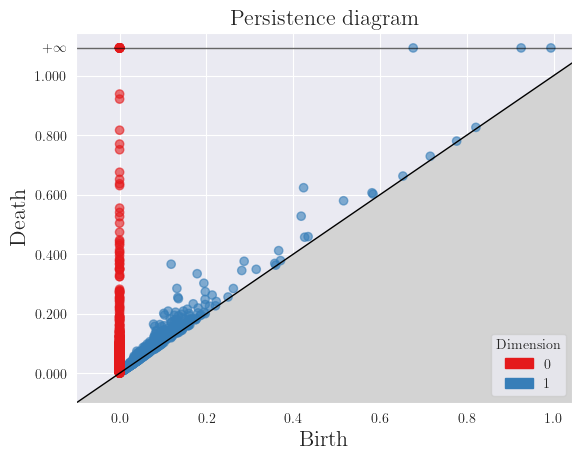

In [24]:
import gudhi as gd
import gudhi.representations

# Build a Rips complex
rips_complex = gd.RipsComplex(points=X_embedded_umap, max_edge_length=1)
simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)

# Compute persistence
diag = simplex_tree.persistence()

# Plot persistence diagram
gd.plot_persistence_diagram(diag)

<Axes: title={'center': 'Persistence barcode'}>

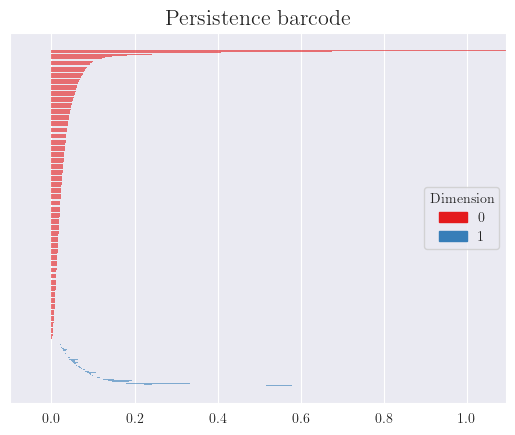

In [25]:
gudhi.plot_persistence_barcode(diag)

/Users/shin/umap_testing/pythonProject1/.venv/lib/python3.13/site-packages/sklearn/cluster/_affinity_propagation.py:140: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


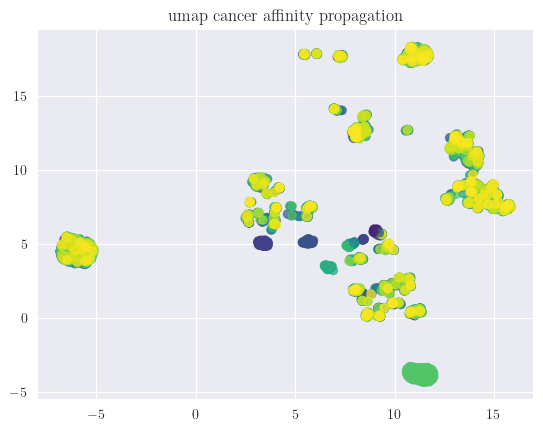

In [31]:
from sklearn.cluster import AffinityPropagation

clustering = AffinityPropagation(random_state=42).fit(X_embedded_umap)
cluster_centers = clustering.cluster_centers_
labels_af = clustering.labels_
plt.title("umap cancer affinity propagation")
plt.scatter(X_embedded_umap[:, 0], X_embedded_umap[:, 1], c=labels_af, cmap="viridis", alpha=0.7)

['3' '2' '2' ... '2' '2' '2']


Text(0, 0.5, 't-SNE Component 2')

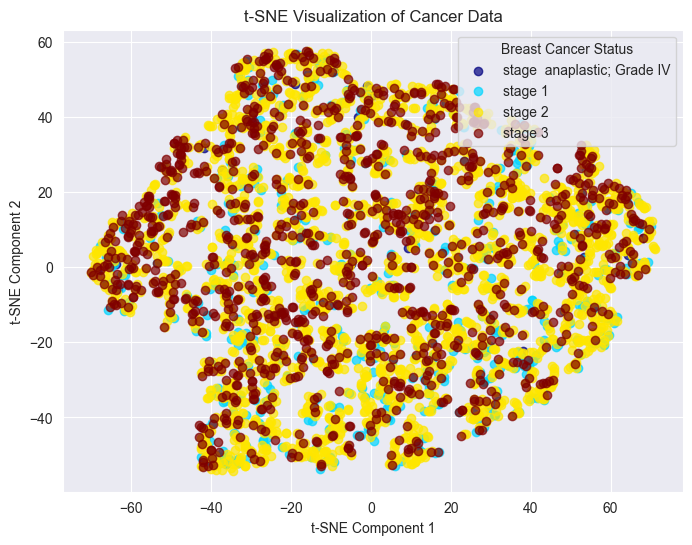

In [40]:
df = pd.read_csv('Breast_Cancer.csv')

# Assuming the last column contains the labels (adjust column name if needed)
label_column = 'Grade'  # Update this to the correct column name in your dataset
X = df.drop(columns=[label_column])  # Drop the label column for t-SNE
labels = df[label_column].values  # Extract labels
X = pd.get_dummies(X)
# Perform t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_embedded = tsne.fit_transform(X)

# Define unique labels and color mapping
unique_labels = np.unique(labels)
colors = plt.cm.jet(np.linspace(0, 1, len(unique_labels)))  # Correct color mapping
label_to_color = {label: color for label, color in zip(unique_labels, colors)}
print(labels)
# Plot t-SNE with colors based on labels
plt.figure(figsize=(8, 6))
for label in unique_labels:
    idx = labels == label  # Proper boolean indexing
    plt.scatter(X_embedded[idx, 0], X_embedded[idx, 1], color=[label_to_color[label]], label=f'stage {label}',alpha=0.7)

plt.legend(title="Breast Cancer Status")
plt.title("t-SNE Visualization of Cancer Data")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")

In [43]:
from sklearn.manifold import trustworthiness
trusts = [trustworthiness(X, X_embedded, n_neighbors=n) for n in range(10,105,10)]
trust = max(trusts)
print(f"Cancer TSNE  Trustworthiness Score: {trust:.4f}")

Cancer TSNE  Trustworthiness Score: 0.9955


In [42]:
from scipy.stats import spearmanr
from sklearn.metrics.pairwise import euclidean_distances

high_dist = euclidean_distances(X)
low_dist = euclidean_distances(X_embedded)

corr, _ = spearmanr(high_dist.ravel(), low_dist.ravel())
print(f"Cancer TSNE Spearman Correlation: {corr:.4f}")

Cancer TSNE Spearman Correlation: 0.7407


In [23]:
num_clusters = 4  # Adjust based on dataset
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
plt.figure(figsize=(8, 6))
plt.title("T-SNE Visualization of cancer Data with kmeans")
plt.xlabel("T-SNE Component 1")
plt.ylabel("T-SNE Component 2")
cluster_labels = kmeans.fit_predict(X_embedded)
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=cluster_labels, cmap="viridis", alpha=0.7)

NameError: name 'KMeans' is not defined

<Axes: title={'center': 'Persistence diagram'}, xlabel='Birth', ylabel='Death'>

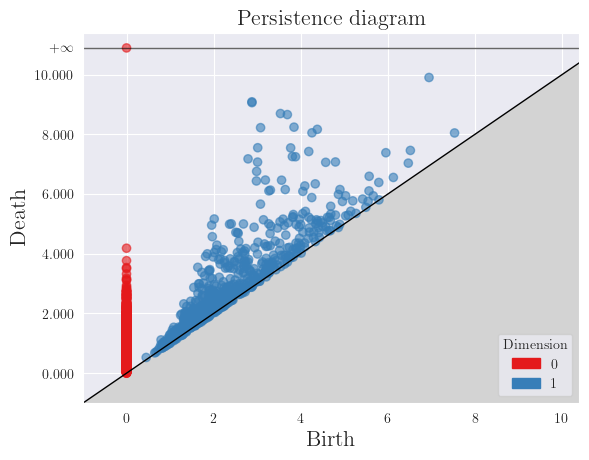

In [27]:
import gudhi as gd
import gudhi.representations

# Build a Rips complex
rips_complex = gd.RipsComplex(points=X_embedded, max_edge_length=20)
simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)

# Compute persistence
diag = simplex_tree.persistence()

# Plot persistence diagram
gd.plot_persistence_diagram(diag)

<Axes: title={'center': 'Persistence barcode'}>

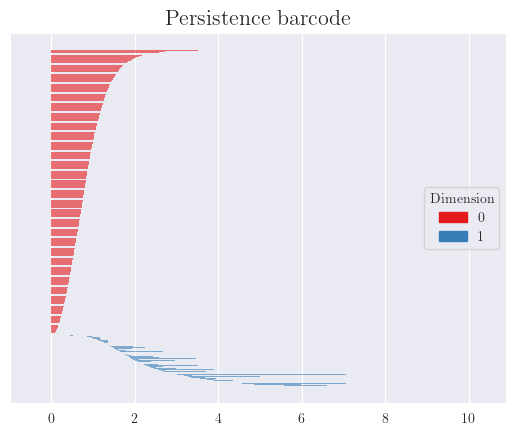

In [28]:
gudhi.plot_persistence_barcode(diag)

/Users/shin/umap_testing/pythonProject1/.venv/lib/python3.13/site-packages/sklearn/cluster/_affinity_propagation.py:140: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


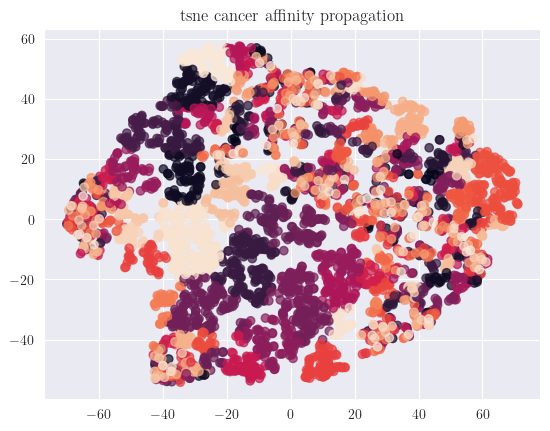

In [30]:
clustering = AffinityPropagation(random_state=42).fit(X_embedded)
cluster_centers = clustering.cluster_centers_
labels_af = clustering.labels_
plt.title("tsne cancer affinity propagation")
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=labels_af, alpha=0.7)

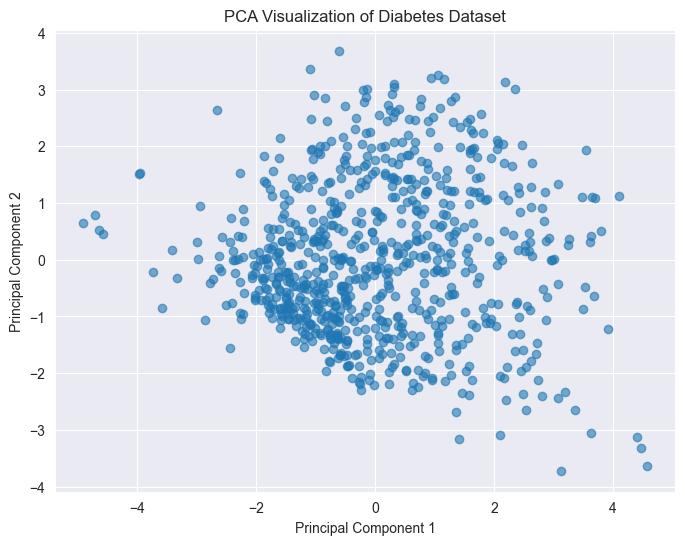

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load dataset
X = pd.read_csv("diabetes.csv")

# Standardize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Convert to DataFrame
df_pca = pd.DataFrame(X_pca, columns=["PC1", "PC2"])

# Scatter plot of PCA components
plt.figure(figsize=(8,6))
plt.scatter(df_pca["PC1"], df_pca["PC2"], alpha=0.6)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Visualization of Diabetes Dataset")
plt.show()